
# DMT 2024 - Homework 1

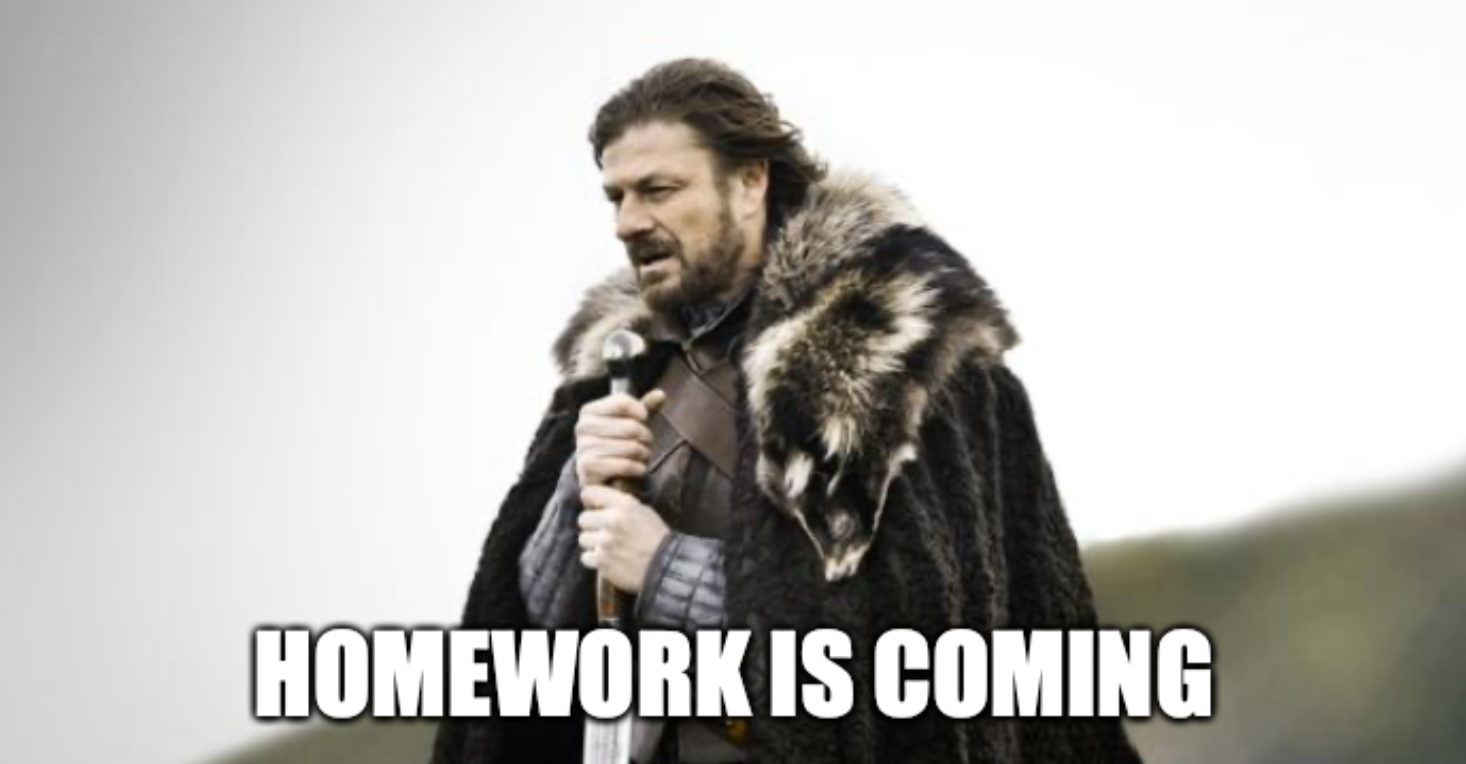


# Instructions for the homework
  > Follow the instructions in the notebook carefully
  


## General instructions
  * Do NOT remove ANYTHING that is already in the notebook.
  * Before you start, show the line number for the code cells:
    * Go to Tools -> Settings -> Editor -> show line numbers
  * Having **EXACTLY TWO** students per group is **MANDATORY**
  * The software must be commented.
  * The notebook will be converted to a PDF, so you must use prints and plots that are displayed in the derived PDF.
  * About this notebook:
    * Create a personal copy to be able to modify it: File > Save a copy in Drive
    * Rename the copied notebook `DMT2024-HW1.ipynb`


## Instructions for **code**:
  * DO NOT add code cells
  * DO NOT remove any code cells
  * Only edit the code cells containing the comment `#YOUR CODE STARTS HERE#`. Within those cells:
    * DO NOT remove ANYTHING that we have written (otherwise specified). In particular, the line `#REMOVE_OUTPUT#` is used in some cells to remove the output of those cells when the notebook is converted to PDF.
    * Add your code between line `#YOUR CODE STARTS HERE#` and line `#YOUR CODE ENDS HERE#`; **DO NOT REMOVE THESE COMMENTS**
    * The last line in each code cell is #THIS IS LINE \<TOT>#, where \<TOT> is a line number. The notebook is constructed so that \<TOT> matches with the line number in which it is written, but it may of course move as you add your code. **Make sure that, when you deliver it, that comment returns to line \<TOT>.** DO NOT CHANGE THE \<TOT> VALUE. Of course, this means that you have a limited number of lines of code that you may NOT exceed under any circumstances. On the other hand, if your code is shorter than that, you have to reach that line number with empty lines.

> Ensure that the notebook can be faithfully reproduced by anyone (hint: pseudo random number generation).

> If you need to set a random seed, set it to `1224`.

[comment]: <> (#REMOVE_CELL#)


## Instructions for **text**:
* DO NOT add text cells
* DO NOT remove text cells
* DO NOT modify the text cells we have created.
* Only edit text cells starting with the comment ------------YOUR TEXT STARTS HERE------------. Within those cells:
  * Do NOT remove anything we have entered.
  * **Add your own text after the line ------------YOUR TEXT STARTS HERE------------; DO NOT REMOVE THIS TEXT**
  * For each cell, a specific delivery will be given. If you are given a maximum number of sentences to write, both the dot "." and the semicolon ";" will be considered sentence dividers.

[comment]: <> (#REMOVE_CELL#)


## *Evaluation*

The homework will be evaluated based on the following criteria:

1. **Code Quality**: correctness, readability (length, comments, unnecessary repetitions)
2. **Quality of Textual Responses**: correctness, clarity, etc.
3. **Quality of Produced Visualizations** (tables/figures/etc.): correctness, clarity, etc.
4. **Quality**, **quantity** and **diversity** of experiments conducted, **results** achieved, etc. \[if applicable; will be clearly indicated\]
5. **Timely Submission**: late submissions will result in significant point deductions
6. **Plagiarism**: copying code/text from colleagues or online sources will result in significant point deductions \[it will be clearly indicated if borrowing code from other sources is allowed\]

[comment]: <> (#REMOVE_CELL#)

## Group composition:

Write down the list of group members. The format should be Last Name, First Name, Student ID. Group members should be sorted alphabetically by surname and placed on different lines.
Example:

Becchetti, Luca, 123456

Siciliano, Federico, 987654

------------YOUR TEXT STARTS HERE------------

Pannacci, Lorenzo, 1948926

Tromboni, Gabriele, 2088799

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Homework 1
The homework consists of three parts:

1. Vector Search

2. Near-Duplicates Detection

3. Dimensionality Reduction

# Part 1
In this part of the homework, you will explore vector search techniques.

Import **ALL** the Python packages that you need for Part 1.

In [ ]:
#REMOVE_OUTPUT#
!pip install --upgrade --no-cache-dir gdown
#YOUR CODE STARTS HERE#
!apt install libomp-dev
!pip install faiss-cpu
import faiss
import tarfile
import numpy as np








#YOUR CODE ENDS HERE#
#THIS IS LINE 15#

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libomp-14-dev libomp5-14
Suggested packages:
  libomp-14-doc
The following NEW packages will be installed:
  libomp-14-dev libomp-dev libomp5-14
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 738 kB of archives.
After this operation, 8,991 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libomp5-14 amd64 1:14.0.0-1ubuntu1.1 [389 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libomp-14-dev amd64 1:14.0.0-1ubuntu1.1 [347 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libomp-dev amd64 1:14.0-55~exp2 [3,074 B]
Fetched 738 kB in 1s (1,171 kB/s)
Selecting previously unselected package libomp5-14:amd64.
(Reading database ... 121920 files and directories currently installed.)
Preparing to unpack .../libomp5-14_1%3a

## Part 1.1
Your task involves evaluating various indexes based on three key metrics: the **quality** of retrieved results, **memory** consumption, and **time** efficiency.

This part must run within a maximum of **30** minutes. To meet this constraint, approximations can be made (using fewer documents, fewer queries) to *estimate* the required parameters. However, these approximations **must be explicitly indicated** in the code.

The **objectives** are:
1. Find the best option for each of the 3 metrics
2. Find an index that represents a good compromise between the 3 metrics

### 1.1.1
Download the Sift10K dataset.

In [ ]:
#YOUR CODE STARTS HERE#

!wget ftp://ftp.irisa.fr/local/texmex/corpus/siftsmall.tar.gz





#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

--2024-05-02 08:27:16--  ftp://ftp.irisa.fr/local/texmex/corpus/siftsmall.tar.gz
           => ‘siftsmall.tar.gz’
Resolving ftp.irisa.fr (ftp.irisa.fr)... 131.254.254.45, 2001:660:7303:254::45
Connecting to ftp.irisa.fr (ftp.irisa.fr)|131.254.254.45|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /local/texmex/corpus ... done.
==> SIZE siftsmall.tar.gz ... 5305734
==> PASV ... done.    ==> RETR siftsmall.tar.gz ... done.
Length: 5305734 (5.1M) (unauthoritative)

siftsmall.tar.gz    100%[===================>]   5.06M  2.42MB/s    in 2.1s    

2024-05-02 08:27:20 (2.42 MB/s) - ‘siftsmall.tar.gz’ saved [5305734]



### 1.1.2
If you need to, prepare here helper functions to run your computations.

In [ ]:
#YOUR CODE STARTS HERE#
def unzip_file(file_name: str):
  tar = tarfile.open(file_name, "r:gz")
  tar.extractall()

def read_fvecs(file):
    a = np.fromfile(file, dtype='int32')
    return a.reshape(-1, a[0] + 1)[:, 1:].copy().view('float32')

def recall():



def memory_consumption():


































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

### 1.1.3
Initiate time calculation for Part 1.

In [ ]:
#YOUR CODE STARTS HERE#

timestamp_part1_start = time.perf_counter()





#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

### 1.1.4
Prepare the data for vector search.


In [ ]:
#YOUR CODE STARTS HERE#
unzip_file('siftsmall.tar.gz')
x_base = read_fvecs('./siftsmall/siftsmall_base.fvecs')
x_query = read_fvecs('./siftsmall/siftsmall_query.fvecs')
ground_truth = read_ivecs('./siftsmall/siftsmall_groundtruth.ivecs')














#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Print the size of your variables.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#
x_base.shape, x_query.shape






#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

((10000, 128), (100, 128))

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.5
Prepare your baseline index and get its metrics.


In [ ]:
#YOUR CODE STARTS HERE#

# baseline index is IndexFlatL2 because is an exact saerch index
d = 128  # dimensionality of Sift10k data
k = 10  # number of nearest neighbors to return

index = faiss.IndexFlatL2(d)
index.add(x_base)
D, I = index.search(x_query, k)    #use xq --> using all queries [it probably runs out of memory on Colab]










#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7f7c99926520> >

Why did you choose this index as baseline? Explain your answer in **at most 1 sentence**.

[comment]: <> (#SHOW_CELL#)

------------YOUR TEXT STARTS HERE------------



<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.6
Build and test as many indices as possible. For each of them, get the required metrics.

In [ ]:
#YOUR CODE STARTS HERE#















































#YOUR CODE ENDS HERE#
#THIS IS LINE 50#

### 1.1.7
Stop time calculation for Part 1.

In [ ]:
#YOUR CODE STARTS HERE#

timestamp_part1_stop = time.perf_counter()





#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

Print the time.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#

time_elapsed_1 = timestamp_part1_stop - timestamp_part1_start

print("The execution lasted for {} ms.".format(time_elapsed_1))






#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.8
Produce a table with your results. If you have approximated your results, you need to write it explicitly and **possibly** do something to show this (e.g. standard deviation? confidence intervals?).

In [ ]:
#YOUR CODE STARTS HERE#



























#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

If focusing solely on one metric, which index would you select? Why do you think that specific index got the best result for that metric? Explain your answer in **at most 3 sentences (1 for each metric)**.

[comment]: <> (#SHOW_CELL#)

------------YOUR TEXT STARTS HERE------------

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

If considering all metrics, which index would you choose and why? Explain your answer in **at most 2 sentences**.

[comment]: <> (#SHOW_CELL#)

------------YOUR TEXT STARTS HERE------------

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.9
Visualize your results. If you have approximated your results, you need to write it explicitly and **possibly** do something to show this (e.g. standard deviation? confidence intervals?).

In [ ]:
#YOUR CODE STARTS HERE#















































#YOUR CODE ENDS HERE#
#THIS IS LINE 50#

Comment your results in **at most 3 sentences**, *possibly* providing new insights and with minimal overlap with previous answers.

[comment]: <> (#SHOW_CELL#)

------------YOUR TEXT STARTS HERE------------

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Part 1.2

### 1.2.1
Suppose you have a document collection represented by an $NxM$ matrix. Vector search is to be performed on this matrix.
Our goal is to retain **all** the information while implementing a form of dimensionality reduction.

What options are available? What are the pros and cons?

**Use at most 3 sentences.**

----------YOUR TEXT STARTS HERE----------


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

# Part 2

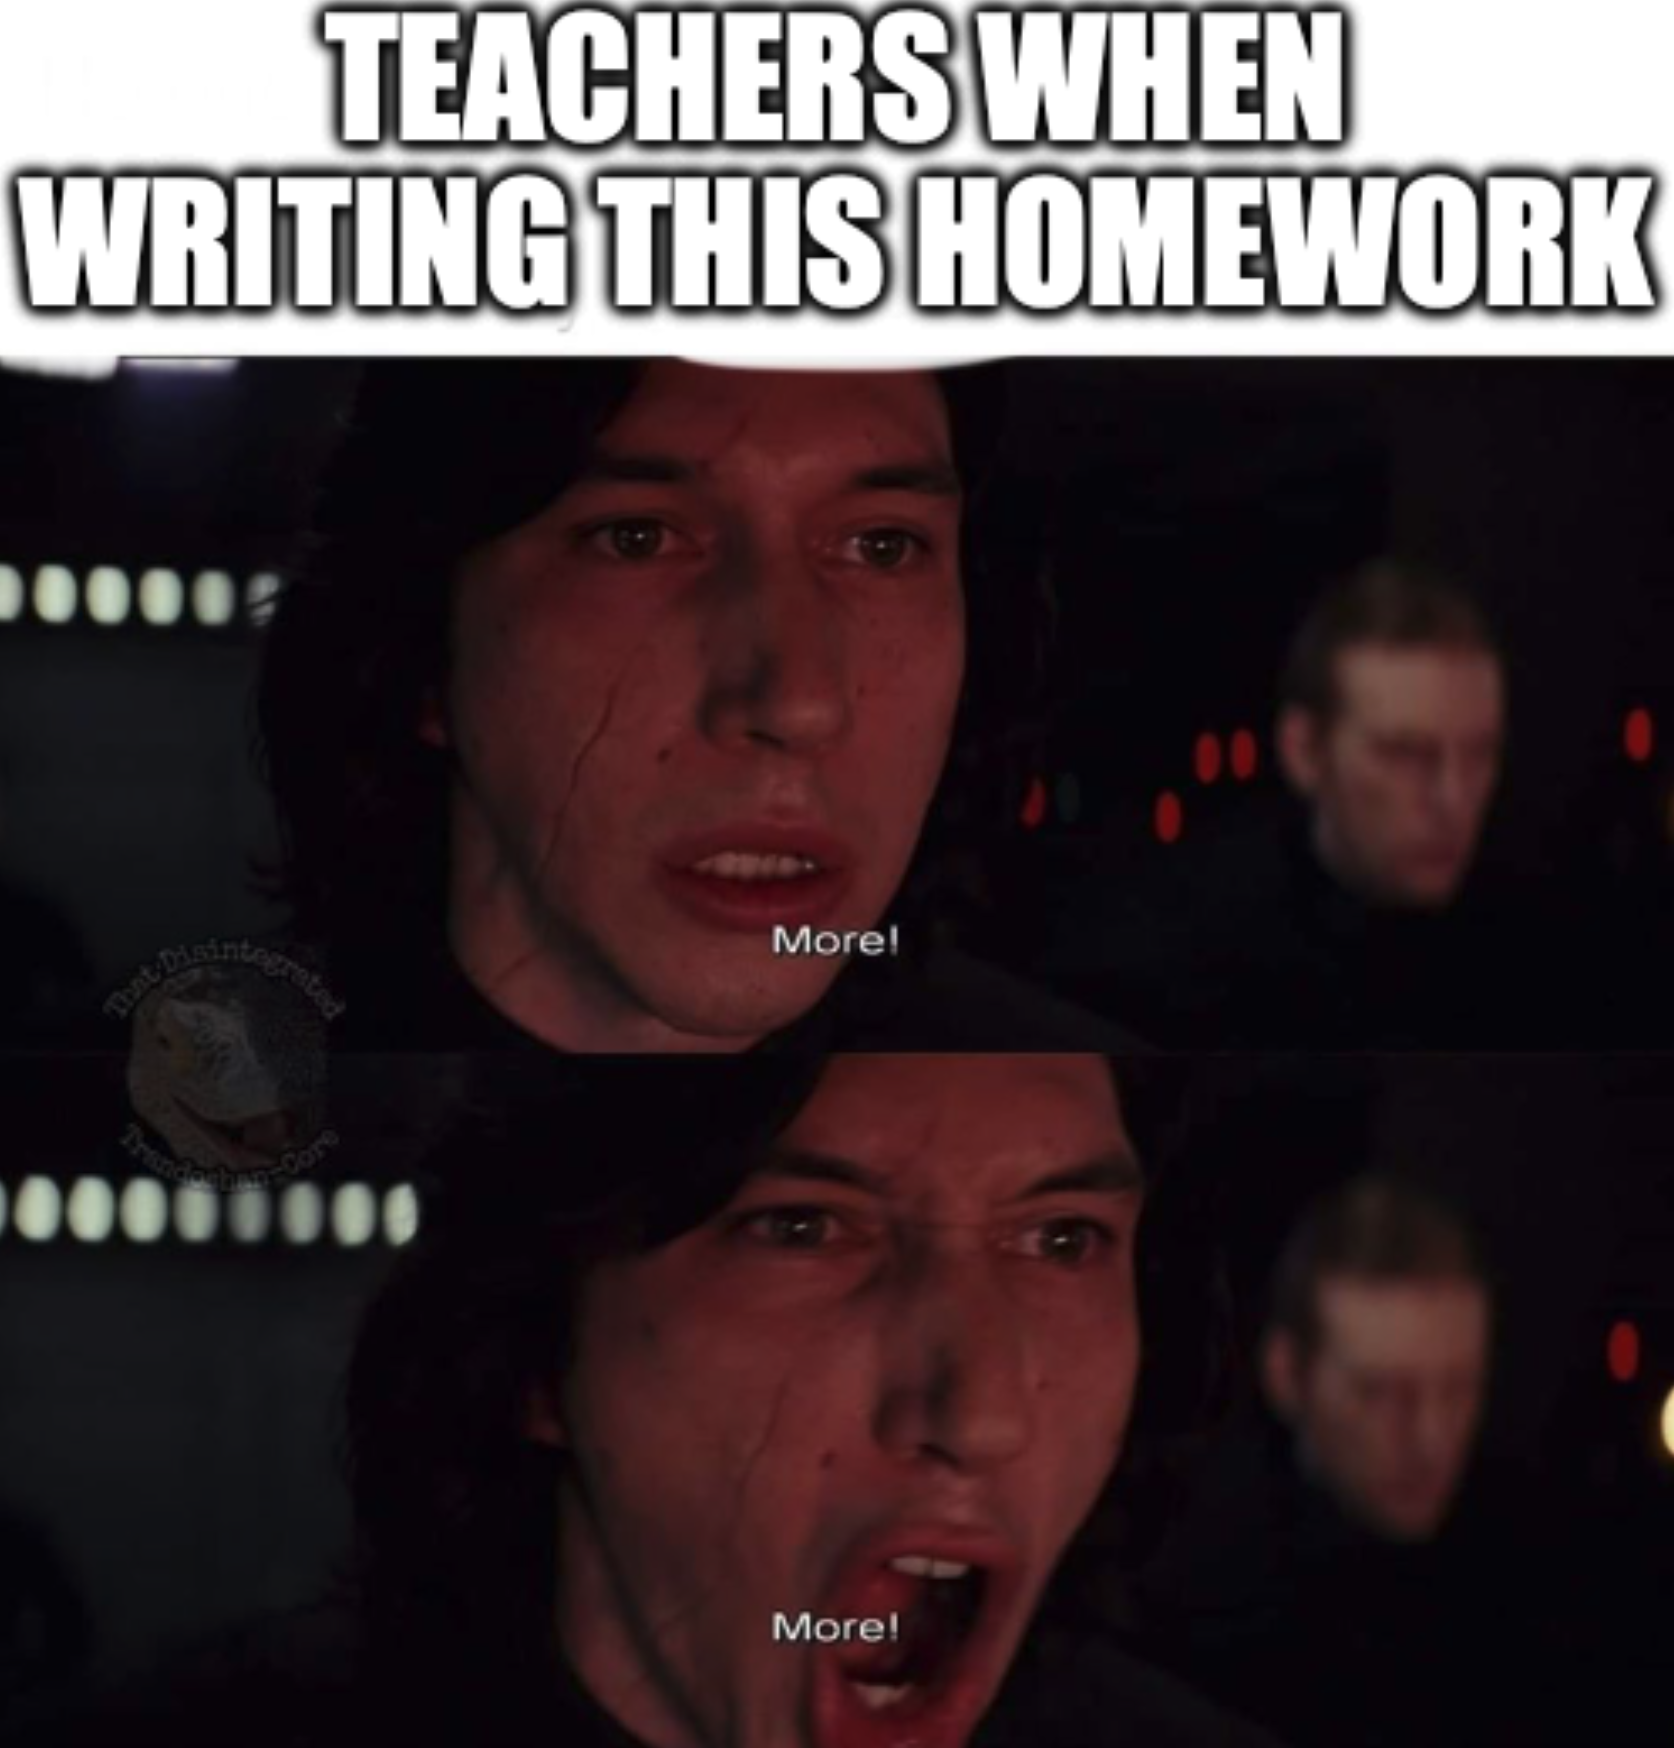

In this part of the homework, you have to find, in an approximated way, all near-duplicate documents inside a collection of documents.

These constraints **must** be satisfied while carrying out this part of the homework:

  * We will consider Near-duplicates all those pair of documents that have a Jaccard similarity greater than or equal to 0.88
  * Each set of shingles, that represents an original document, must be sketched in a Min-Hashing sketch with a length of at most 251
  * The probability to have as a near-duplicate candidate a pair of documents with Jaccard=0.88 must be > 0.99
  * The generation process of near-duplicate pairs you implement must generate the smallest amount of both **False-Negatives** and **False-Positives**
  * The running time of **all** the LSH process (LSH + approximate Jaccard) must be less than 4 minutes.

Import **ALL** the Python packages that you need for Part 2.

In [ ]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
import csv
import random
import itertools as it
import numpy as np










#YOUR CODE ENDS HERE#
#THIS IS LINE 15#


#### NDD functions
A range of functions to perform the Near-Duplicates pipeline is provided by us. You are free to use the functions from Lab 1. If you choose to do so, **you must not modify** them under any circumstances and you can simply copy the corresponding cell cells below. You must also indicate this in the next text cell (delete the other answer). If you decide to re-implement them, you may obtain better results (time, performance), but they must be properly commented.

------------YOUR TEXT STARTS HERE------------

I have chosen to use the functions from Lab 1: ***yes/no***

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>


##### Shingling

In [ ]:
#IF YOU DECIDE TO RE-IMPLEMENT THIS FUNCTION, COMPLETE THIS CELL. OTHERWISE, DELETE IT.#
#YOUR CODE STARTS HERE#
def create_sets_of_shingle_ids(input_file_name, output_file_name,
                               input_file_delimiter='\t', input_file_quotechar='"',
                               set__characters_of_interest=[" "], shingle_width=3,
                               doc_id_column_idx=0, field_column_idx=1):

    max_shingle_id = ...

    return max_shingle_id
























































































#YOUR CODE ENDS HERE#
#THIS IS LINE 100#

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>


##### MinWise Hashing

In [ ]:
#IF YOU DECIDE TO RE-IMPLEMENT THIS FUNCTION, COMPLETE THIS CELL. OTHERWISE, DELETE IT.#
#YOUR CODE STARTS HERE#
def create_MinWiseHashing_sketches(input_file_name, upper_bound_on_number_of_distinct_elements,
                                   number_of_hash_functions,
                                   output_file_name):

    ...

    return

























































































#YOUR CODE ENDS HERE#
#THIS IS LINE 100#

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>


##### Locality-Sensitive Hashing

In [ ]:
#IF YOU DECIDE TO RE-IMPLEMENT THIS FUNCTION, COMPLETE THIS CELL. OTHERWISE, DELETE IT.#
#YOUR CODE STARTS HERE#
def mine_couples_of_Near_Duplicates(input_file_name, output_file_name, r, b, jaccard_threshold):

    ...

    return



























































































#YOUR CODE ENDS HERE#
#THIS IS LINE 100#

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Part 2.1

### 2.1.1
Download the dataset from the Drive link (code already provided).

In [ ]:
#REMOVE_OUTPUT#
!gdown 16LQDmla82XFK1B0lr8H9ycm01pxjURXN

### 2.1.2
Inspect the dataset: print the list of fields names. Print the value of the `year` field for the first 4 documents.

In [ ]:
#YOUR CODE STARTS HERE#

















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 2.1.3
Turn the lyrics field of each document into a sets of shingles of length 3 and save the result to a file named `hw1__set_id_set_of_integers.tsv`

In [ ]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 2.1.4
Load the file containing the sets of shingles and apply MinWiseHashing, saving the result into a file named `hw1__set_id_MinWiseHashing_sketch.tsv`. Choose the number of hash functions (n) in relation to the constraints highlighted at the beginning of part 2.

In [ ]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#

















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Provide an explanation for your choice of *n* in **exactly one sentence**.

[comment]: <> (#SHOW_CELL#)

------------YOUR TEXT STARTS HERE------------

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.5
To perform Locality Sensivity Hashing, you have to choose the number of rows (r) and the number bands (b). List all the possible choices of r and b that satisfy the constraints highlighted at the beginning of part 2, according to the number of hash functions you chose.

For all of these configurations, plot all the associated S-curves. The S-curve is defined as the probability (y-axis) that a pair of documents with Jaccard similarity j (x-axis) is selected as a near-duplicate candidate given r and b. Plot all S-curves in the same plot.

In [ ]:
#YOUR CODE STARTS HERE#



























#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

### 2.1.6
Among all the configurations you plotted in the previous step, choose the one that gives the smallest amount of False-Positives and False-Negatives near-duplicates candidates, satisfying the provided constraints. You **must** take into account, that after the LSH procedure, the approximate Jaccard similarity between near-duplicate candidates is computed and used to reduce their number.

Load the file containing the MinWiseHashing sketches and perform Locality Sensivity Hashing, using the parameters you chose. Save the Near-Duplicates candidates obtained to a file named `hw1__NearDuplicates_set_a_id_set_b_id_approximate_jaccard.tsv`.

If you are still within the time constraints, you have the option to execute additional LSH procedures.

Compute the execution time of each LSH procedure.

In [ ]:
#YOUR CODE STARTS HERE#















































#YOUR CODE ENDS HERE#
#THIS IS LINE 50#

Print the execution time of each LSH and the complete exection time.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#







#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

Provide an explanation for your method and which final result you are retaining in **at most 4 sentences**.

[comment]: <> (#SHOW_CELL#)

------------YOUR TEXT STARTS HERE------------

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.7
Load the file containing the number of near-duplicates candidates. Print the number of near-duplicates candidates you found.

In [ ]:
#YOUR CODE STARTS HERE#



























#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Part 2.2
You will be given a scenario and you will have to provide the best solution.

### 2.2.1

Let us consider the same scenario as in Part 2.1, with the only addition of not wanting more than 100 False Positives. How would the choice of the LSH configuration change? Would you need any more information to satisfy the new constraint? Would you need to modify the Near-Duplicates Detection pipeline? A brute-force approach is not considered as a valid solution.

Provide your answer in **at most 3 sentences**.

------------YOUR TEXT STARTS HERE------------

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

# Part 3
In this part of the homework, you have to deal with Dimensionality Reduction.

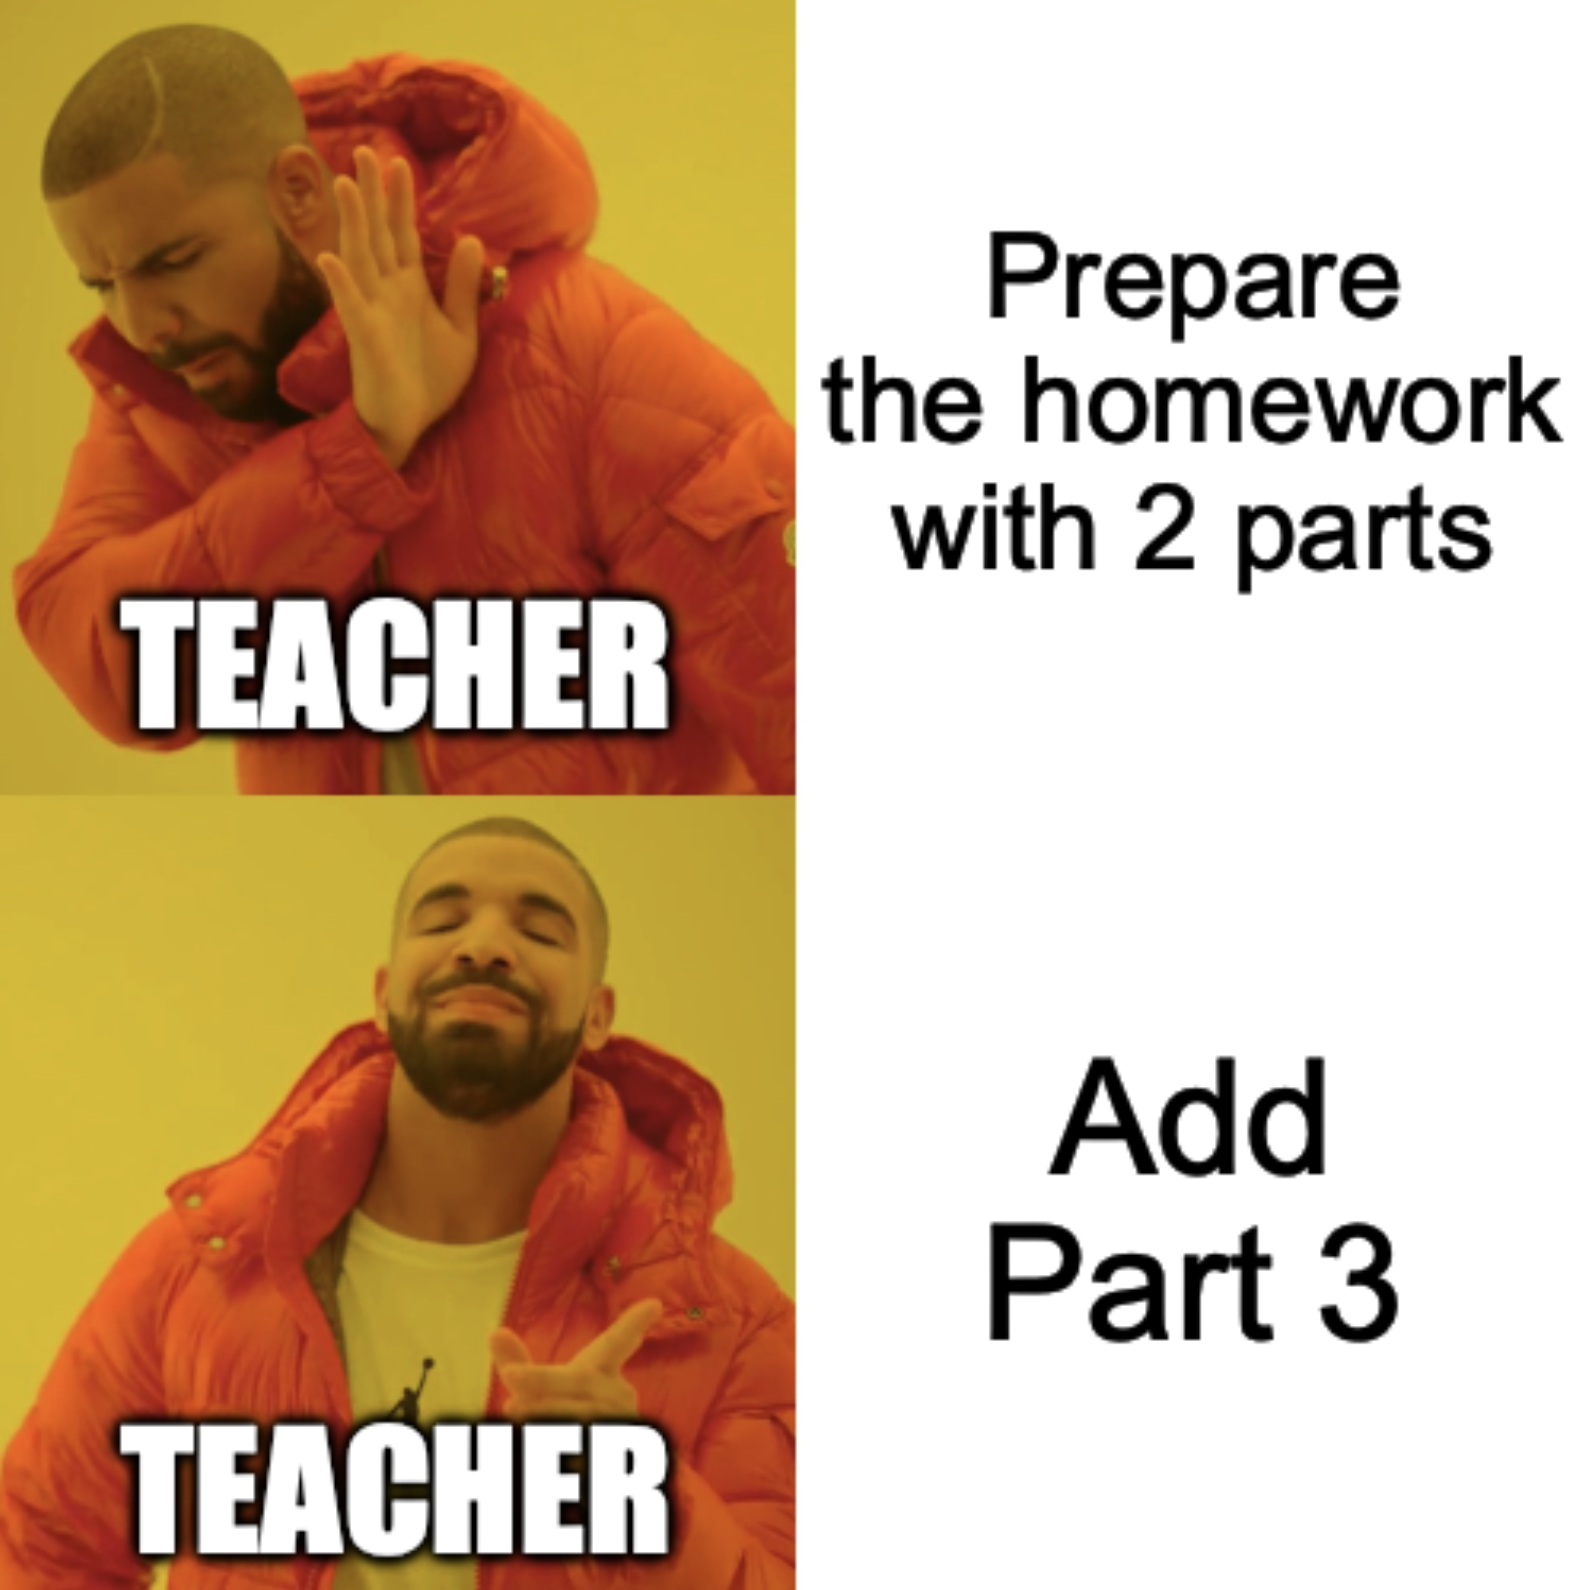

Import **ALL** the Python packages that you need for Part 3.

In [ ]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#

import time
import random
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import scipy.sparse
import matplotlib.pyplot as plt

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Part 3.1
The data you need to process consists of reviews.

You have to carry out Topic Modeling.

The goal is to achieve a topic division within the following limits:

- The total computation may not exceed 20 minutes
- The division into topics must be the "best one"

### 3.1.1
Download the data from the Drive link (code already provided).

In [ ]:
#REMOVE_OUTPUT#
!gdown 1fAivTG_Uj6P_3D7QM8_VrADB243Rdq5T

Downloading...
From: https://drive.google.com/uc?id=1fAivTG_Uj6P_3D7QM8_VrADB243Rdq5T
To: /content/text.csv
100% 36.8M/36.8M [00:00<00:00, 68.6MB/s]


### 3.1.2
Initiate time calculation for Part 3.

In [ ]:
#YOUR CODE STARTS HERE#

timestamp_part3_start = time.perf_counter()





#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

### 3.1.3
Preprocess the data

> Each document must be a list of terms

> Discard documents that have less than 12 (non-unique) words before the preprocessing (split by whitespace, ignore punctuation)

> After preprocessing, each document must be represented by at least 6 tokens

- Several preprocessing options are possible



In [ ]:
#YOUR CODE STARTS HERE#

df = pd.read_csv("/content/text.csv", names=["text"])

# discard documents that have less than 12 (non-unique) words before the
# preprocessing (split by whitespace, ignore punctuation)

df["n_words"] = df["text"].apply(lambda x: len(x.split(" ")))
df = df[df['n_words'] >= 12]

# preprocessing

# substitute uppercase with lowercase
df.loc[:, "text"] = df["text"].apply(lambda x: x.lower())

# remove punctuation and numbers
df.loc[:, "text"] = df["text"].str.replace(r'(\\n)|[^a-z ]', ' ', regex=True)

# split into terms
df["terms"] = df["text"].apply(lambda x: x.split(" "))

# remove stopwords
en_stop = set(stopwords.words('english'))
df.loc[:, "terms"] = df["terms"].apply(lambda x: [term for term in x if term not in en_stop])

# remove small words (less then 2 letters)
df.loc[:, "terms"] = df["terms"].apply(lambda x: [term for term in x if len(term) >= 2])

# after preprocessing, each document must be represented by at least 6 tokens
df = df[df['terms'].apply(lambda x: len(x) >= 6)]








#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Print at most 6 documents where the (preprocessed) term `eating` appears.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#

df_eating = df[df['terms'].apply(lambda x: "eating" in x)]

df_eating.head(n=6)["terms"]



#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

4      [food, good, husband, ate, couple, weeks, ago,...
32     [know, bad, mcdonald, gets, star, review, mean...
45     [mean, person, vindictive, person, bear, frien...
72     [incredible, experience, would, say, goes, one...
86     [brick, wood, fired, smoker, cast, iron, door,...
143    [always, good, experience, eating, lunch, yea,...
Name: terms, dtype: object

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 3.1.4
Build a dictionary of the terms in the documents.

In [ ]:
#YOUR CODE STARTS HERE#

dictionary = corpora.Dictionary(df["terms"])















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Print out the 5 most common terms

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#

term_frequencies = [(term, freq) for term, freq in dictionary.dfs.items()]
sorted_terms = sorted(term_frequencies, key=lambda x: x[1], reverse=True)
for i in range(0, 5):
  term, freq = sorted_terms[i]
  print("n.{} most common term is '{}' with a frequency of {}.".format(i+1, dictionary[term], freq))

#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

n.1 most common term is 'good' with a frequency of 19187.
n.2 most common term is 'place' with a frequency of 19089.
n.3 most common term is 'food' with a frequency of 18510.
n.4 most common term is 'like' with a frequency of 15901.
n.5 most common term is 'service' with a frequency of 14818.


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 3.1.5
Perform a document-term encoding of the dataset.

- Several encodings are possible

In [ ]:
#YOUR CODE STARTS HERE#

doc_term_matrix = [dictionary.doc2bow(doc) for doc in df["terms"]]















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Print out the sparsity of the matrix

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#
size_original_matrix = len(doc_term_matrix)*len(dictionary)
print("Document-Term Matrix has shape {} x {}. It is made of {} elements.".format(len(doc_term_matrix), len(dictionary), size_original_matrix))
size_sparse_matrix = sum(len(col) for col in doc_term_matrix)
print("\nOur sparse representation is instead made of {} elements.".format(sum(len(col) for col in doc_term_matrix)))
percentage_sparsity = (1 - size_sparse_matrix / size_original_matrix) * 100
print("\nThefore the matrix is {}% sparse!".format(percentage_sparsity))

#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

Document-Term Matrix has shape 48905 x 62154. It is made of 3039641370 elements.

Our sparse representation is instead made of 2757511 elements.

Thefore the matrix is 99.90928169924203% sparse!


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 3.1.6
Perform Latent Semantic Analysis for at least 3 different numbers of topics.

In [ ]:
#YOUR CODE STARTS HERE#

random.seed(1224)

lsa_models = []
n_topics_list = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

for n_topics in n_topics_list:
  model = LsiModel(doc_term_matrix, num_topics=n_topics, id2word = dictionary)
  lsa_models.append(model)








#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 3.1.7
For each of the calculations above, calculate a measure of the "goodness" of the division into topics.

In [ ]:
#YOUR CODE STARTS HERE#

coherence_scores = []

for model in lsa_models:
  score = CoherenceModel(model=model, texts=df["terms"], dictionary=dictionary, coherence='c_v').get_coherence()
  coherence_scores.append(score)











#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Plot the measure as the number of topics varies.

[comment]: <> (#SHOW_CELL#)

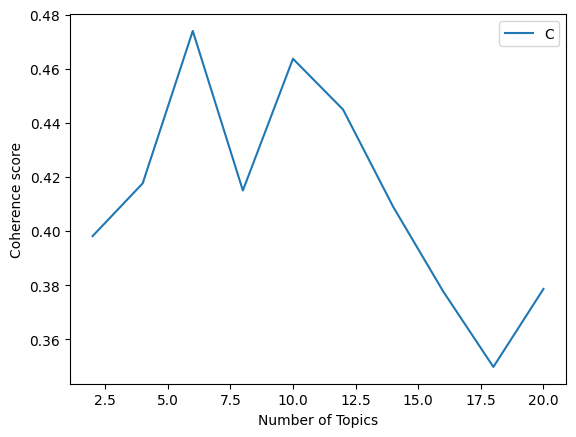

In [ ]:
#YOUR CODE STARTS HERE#

plt.plot(n_topics_list, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence values"), loc='best')
plt.show()











#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Which number of topics is the "best" to model this dataset?

**Use at most 2 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 3.1.8
Stop time calculation for Part 3.

In [ ]:
#YOUR CODE STARTS HERE#

timestamp_part3_stop = time.perf_counter()





#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

Print the time.

[comment]: <> (#SHOW_CELL#)

In [ ]:
#YOUR CODE STARTS HERE#

time_elapsed = timestamp_part3_stop - timestamp_part3_start

print("The execution lasted for {} ms.".format(time_elapsed))



#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 3.1.9
Using LSA with the number of topics you identified as best, print the 8 most important words for the 3 most important topics.

In [ ]:
#YOUR CODE STARTS HERE#

















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Explain how you selected the 3 most important topics.

**Use at most 1 sentence.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------


Try to give an explanation of the topic division you obtained.

**Use at most 2 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Part 3.2

### 3.2.1
Suppose you have $K$ matrices $\{X_1,\dots,X_K\}$, each with a different $N_k$ number of samples and $M_k$ number of features.

Assume that each feature occupies a different number $b_k$, dependent on the matrix, of memory units and that this cannot be changed (e.g. you cannot change the precision of floats).

Suppose further that each matrix has the same "importance".

You only have $B$ units of memory available on your storage medium.

Assuming that the entire dataset cannot fit on your storage medium, how would you accommodate all $K$ matrices and all their $N_k$ samples while retaining as much information about your data as possible?

**Use at most 3 sentences.**

----------YOUR TEXT STARTS HERE----------


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>


# Submission instructions

Follow the instructions precisely
1. Run the whole notebook up to this point
  * Click on this text cell and go to Runtime > Run before
  * It is essential that the notebook can be run from start to finish without us having to change anything.
2. Download the current notebook
  * File -> Download -> Download .ipynb
3. Upload the downloaded notebook in the current runtime
  * In the left sidebar menu, open the last tab (Files)
  * Click on the first button under the File title (Page with arrow pointing up)
  * In the new window, upload the notebook just downloaded



4. To turn the notebook into a pdf you need to install a Tex extension. Simply run the next cell of code:

In [ ]:
#REMOVE_CELL#
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

5. Now, run the next cell to set some cell tags in the notebook file.

In [ ]:
#REMOVE_CELL#
import nbformat as nbf
from glob import glob
notebooks = glob("/content/**/*.ipynb", recursive=True)

text_search_dict = ["YOUR TEXT STARTS HERE","#YOUR CODE STARTS HERE#","#SHOW_CELL#"]

for ipath in notebooks:
    print(ipath)
    ntbk = nbf.read(ipath, nbf.NO_CONVERT)

    for cell in ntbk.cells:
        cell_type = cell['cell_type'] == "code"

        cell_tags = cell.get('metadata', {}).get('tags', [])
        cell_tags = set(cell_tags)
        if "remove_cell" in cell_tags:
            cell_tags.remove("remove_cell")

        if cell_type == 0: #markdown
          if (cell['source'][0]!="#" and text_search_dict[cell_type] not in cell['source'] and text_search_dict[-1] not in cell['source'] and "pagebreak" not in cell['source']) or "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")

        else: #code
          #if text_search_dict[cell_type] not in cell['source'] or "#REMOVE_CELL#" in cell['source']:
          if "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")
          elif "#REMOVE_OUTPUT#" in cell['source']:
            cell_tags.add("remove_output")

        if len(cell_tags) > 0:
            cell['metadata']['tags'] = list(cell_tags)

    nbf.write(ntbk, ipath)

6. Now, run the next cell to transform the notebook to PDF without the code cells.
  * The file will appear in the menu on the left (refresh if needed). The file should be named `DMT2024_HW1.pdf`
  * Rename this file **Surname1_Surname2_DMT2024_HW1_report.pdf** (e.g. Becchetti_Siciliano_DMT2024_HW1_report.pdf). Sort the surnames alphabetically.
  * Click on it and using the right button or the three dots at its side, click on download to transfer it to your local PC
  

In [ ]:
#REMOVE_CELL#
!jupyter nbconvert /content/DMT2024_HW1.ipynb --to pdf --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}' -TagRemovePreprocessor.remove_all_outputs_tags='{"remove_output"}'

7. Now, rename the downloaded notebook **Surname1_Surname2_DMT2024_HW1_notebook.ipynb** (e.g. Becchetti_Siciliano_DMT2024_HW1_notebook.ipynb). Sort the surnames alphabetically.

8. Now that you have both files, you need to upload them to Classroom. Only the student with the surname that comes first in alphabetical order **must** upload the files. Only the files uploaded by this student will be graded. Upload the report (.pdf) first, then the notebook (.ipynb).